Загружаем данные

In [53]:
import numpy as np
from tensorflow import keras as ks
import tensorflow as tf
import pickle as cPickle

In [54]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [55]:
ds=unpickle("cifar-100-python/train")
ds.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [56]:
xtrain=ds[b'data']
x_train=xtrain.reshape(50000,3,32,32)
x_train=np.transpose(x_train,(0,2,3,1))

yltrain=ds[b'fine_labels']
y_train=np.reshape(yltrain,(50000,1))
ycstrain=ds[b'coarse_labels']
yc_train=np.reshape(ycstrain,(50000,1))
x_train.shape

(50000, 32, 32, 3)

In [57]:
ds=unpickle("cifar-100-python/test")
ds.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [58]:
xtest=ds[b'data']
x_test=xtest.reshape(10000,3,32,32)
x_test=np.transpose(x_test,(0,2,3,1))
yltest=ds[b'fine_labels']
y_test=np.reshape(yltest,(10000,1))
ycstest=ds[b'coarse_labels']
yc_test=np.reshape(ycstest,(10000,1))
x_test.shape

(10000, 32, 32, 3)

In [59]:
#from tensorflow.keras.datasets import cifar100
#(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode="fine")

In [60]:
import matplotlib.pyplot as plt 

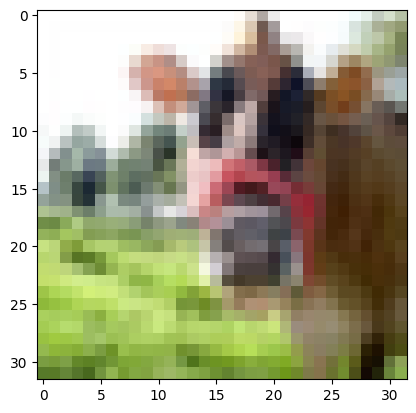

In [61]:
plt.imshow(x_train[0])

In [62]:
x_train.shape

(50000, 32, 32, 3)

In [63]:
y_train.shape

(50000, 1)

In [64]:
y_train[0][0]

19

Нормализация данных

In [65]:
def normalize(ds):
    max=np.max(ds)
    min=np.min(ds)
    normalized=(ds-min)/(max-min)
    return normalized

In [66]:
x_train_norm=normalize(x_train)
x_test_norm =normalize(x_test)

In [67]:
np.min(x_test_norm)

0.0

Создание модели

1) **Объяснить, какие элементы вашей сети зависят от количества цветов, какие — от количества классов.**

Входной слой (сверточный слой) зависит от количества цветов, выходной слой (полносвязный) от количества классов

------------------------


2) **Объяснить место в модели каждого слоя, обосновать выбор гиперпараметров**



С помощью сверточного слоя  модель будет распознавать что изображено на снимке.



Гиперпараметры сверточного слоя:

 Выбор размера ядра:
 
    Выбор оптимального размера ядра зависит от размытости картинки, ее размера, размер ядра выбирают нечетный так как легко определить центральный пиксель.
    С увеличением размера ядра увеличевается и сложность вычислений, поэтому стоит брать не слишком большой размер, например 3*3.

Функция активации:

    Функция relu- часто используемая функция мало затратная для вычислений.
Количество фильтров:

    Наилучшим для сети с одним сверточным слоем является число фильтров 32

Maxpooling нужен для уменьшения размера изображения, а соответственно  уменьшается требуемая вычислительная мощность.Также цель слоя пулинга убрать лишние детали оставляя, при этом выделенные признаки.
Flatten - уменьшение размерности вывода

Выходной слой:

    Полносвязный слой с 100 нейронами (100 классов)  и c функцией активации softmax

In [68]:
#ks.backend.clear_session()
model = ks.Sequential([
    ks.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32, 32,3),activation=tf.nn.relu),
    ks.layers.MaxPooling2D(pool_size=(2, 2)),
    ks.layers.Flatten(),
    ks.layers.Dense(100, activation=tf.nn.softmax)
])

In [69]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 100)               720100    
                                                                 
Total params: 720996 (2.75 MB)
Trainable params: 720996 (2.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Тренировка модели

In [71]:
model.fit(x_train_norm, y_train,batch_size=100,epochs=10)

Epoch 1/10
500/500 [==============================] - 19s 37ms/step - loss: 3.6943 - accuracy: 0.1620
Epoch 2/10
500/500 [==============================] - 18s 36ms/step - loss: 3.0296 - accuracy: 0.2854
Epoch 3/10
500/500 [==============================] - 18s 36ms/step - loss: 2.7335 - accuracy: 0.3446
Epoch 4/10
500/500 [==============================] - 18s 36ms/step - loss: 2.5465 - accuracy: 0.3843
Epoch 5/10
500/500 [==============================] - 18s 36ms/step - loss: 2.4017 - accuracy: 0.4153
Epoch 6/10
500/500 [==============================] - 18s 36ms/step - loss: 2.2818 - accuracy: 0.4387
Epoch 7/10
500/500 [==============================] - 18s 37ms/step - loss: 2.1776 - accuracy: 0.4624
Epoch 8/10
500/500 [==============================] - 18s 36ms/step - loss: 2.0810 - accuracy: 0.4832
Epoch 9/10
500/500 [==============================] - 18s 36ms/step - loss: 1.9915 - accuracy: 0.5042
Epoch 10/10
500/500 [==============================] - 18s 36ms/step - loss: 1.908

In [72]:
model.fit(x_train_norm, y_train,batch_size=100,epochs=10)

Epoch 1/10
500/500 [==============================] - 19s 38ms/step - loss: 1.8287 - accuracy: 0.5453
Epoch 2/10
500/500 [==============================] - 19s 38ms/step - loss: 1.7536 - accuracy: 0.5625
Epoch 3/10
500/500 [==============================] - 19s 38ms/step - loss: 1.6840 - accuracy: 0.5776
Epoch 4/10
500/500 [==============================] - 20s 39ms/step - loss: 1.6133 - accuracy: 0.5937
Epoch 5/10
500/500 [==============================] - 20s 40ms/step - loss: 1.5421 - accuracy: 0.6122
Epoch 6/10
500/500 [==============================] - 20s 40ms/step - loss: 1.4802 - accuracy: 0.6285
Epoch 7/10
500/500 [==============================] - 19s 37ms/step - loss: 1.4156 - accuracy: 0.6432
Epoch 8/10
500/500 [==============================] - 20s 40ms/step - loss: 1.3552 - accuracy: 0.6598
Epoch 9/10
500/500 [==============================] - 20s 40ms/step - loss: 1.2958 - accuracy: 0.6752
Epoch 10/10
500/500 [==============================] - 20s 39ms/step - loss: 1.234

Вторая модель

Обучение второй модели

In [73]:
model2 = ks.Sequential([
    ks.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32, 32,3),activation=tf.nn.relu),
    ks.layers.MaxPooling2D(pool_size=(2, 2)),
    ks.layers.Flatten(),
    ks.layers.Dense(20, activation=tf.nn.softmax)
])

In [74]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [75]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_1 (Dense)             (None, 20)                144020    
                                                                 
Total params: 144916 (566.08 KB)
Trainable params: 144916 (566.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
model2.fit(x_train_norm, yc_train,batch_size=100,epochs=10)

Epoch 1/10
500/500 [==============================] - 16s 30ms/step - loss: 2.3956 - accuracy: 0.2739
Epoch 2/10
500/500 [==============================] - 15s 30ms/step - loss: 2.0891 - accuracy: 0.3701
Epoch 3/10
500/500 [==============================] - 16s 31ms/step - loss: 1.9855 - accuracy: 0.4014
Epoch 4/10
500/500 [==============================] - 15s 31ms/step - loss: 1.9215 - accuracy: 0.4219
Epoch 5/10
500/500 [==============================] - 15s 30ms/step - loss: 1.8686 - accuracy: 0.4379
Epoch 6/10
500/500 [==============================] - 15s 30ms/step - loss: 1.8223 - accuracy: 0.4544
Epoch 7/10
500/500 [==============================] - 15s 30ms/step - loss: 1.7784 - accuracy: 0.4644
Epoch 8/10
500/500 [==============================] - 15s 30ms/step - loss: 1.7371 - accuracy: 0.4797
Epoch 9/10
500/500 [==============================] - 15s 30ms/step - loss: 1.7014 - accuracy: 0.4873
Epoch 10/10
500/500 [==============================] - 15s 30ms/step - loss: 1.665

In [77]:
model2.fit(x_train_norm, yc_train,batch_size=100,epochs=10)

Epoch 1/10
500/500 [==============================] - 15s 30ms/step - loss: 1.6335 - accuracy: 0.5099
Epoch 2/10
500/500 [==============================] - 15s 30ms/step - loss: 1.6049 - accuracy: 0.5156
Epoch 3/10
500/500 [==============================] - 15s 30ms/step - loss: 1.5745 - accuracy: 0.5254
Epoch 4/10
500/500 [==============================] - 15s 30ms/step - loss: 1.5500 - accuracy: 0.5336
Epoch 5/10
500/500 [==============================] - 15s 30ms/step - loss: 1.5228 - accuracy: 0.5412
Epoch 6/10
500/500 [==============================] - 15s 30ms/step - loss: 1.4978 - accuracy: 0.5488
Epoch 7/10
500/500 [==============================] - 15s 30ms/step - loss: 1.4774 - accuracy: 0.5537
Epoch 8/10
500/500 [==============================] - 15s 31ms/step - loss: 1.4561 - accuracy: 0.5607
Epoch 9/10
500/500 [==============================] - 16s 32ms/step - loss: 1.4325 - accuracy: 0.5691
Epoch 10/10
500/500 [==============================] - 15s 31ms/step - loss: 1.412

3. Сравнить качество предсказания при обучении на 20 широких классах с предсказаниями при обучении на 100 узких классах,
обобщив предсказания по узким меткам до метки их широкого класса в соответствии с таблицей:

Сравнение результатов двух моделей

In [78]:
loss,accuracy=model.evaluate(x_test_norm, y_test, batch_size=32)

313/313 [==============================] - 2s 5ms/step - loss: 3.1109 - accuracy: 0.3454


In [79]:
loss,accuracy=model2.evaluate(x_test_norm, yc_test, batch_size=32)

313/313 [==============================] - 2s 4ms/step - loss: 1.9764 - accuracy: 0.4309


4. Исследовать с помощью графиков метрики предсказания для каких узких классов более всего отличаются от метрик их более
широких классов. Выдвинуть предположение о причине возможного отличия.

In [80]:
import pandas as pd

In [81]:
predictions=model.predict(x_test_norm)
predictions.shape

313/313 [==============================] - 2s 5ms/step


(10000, 100)

In [82]:
predictedclasses=np.argmax(predictions,axis=1)
predictedclasses.sort()

In [83]:
images_per_class=pd.Series(predictedclasses)
images_per_class

0        0
1        0
2        0
3        0
4        0
        ..
9995    99
9996    99
9997    99
9998    99
9999    99
Length: 10000, dtype: int64

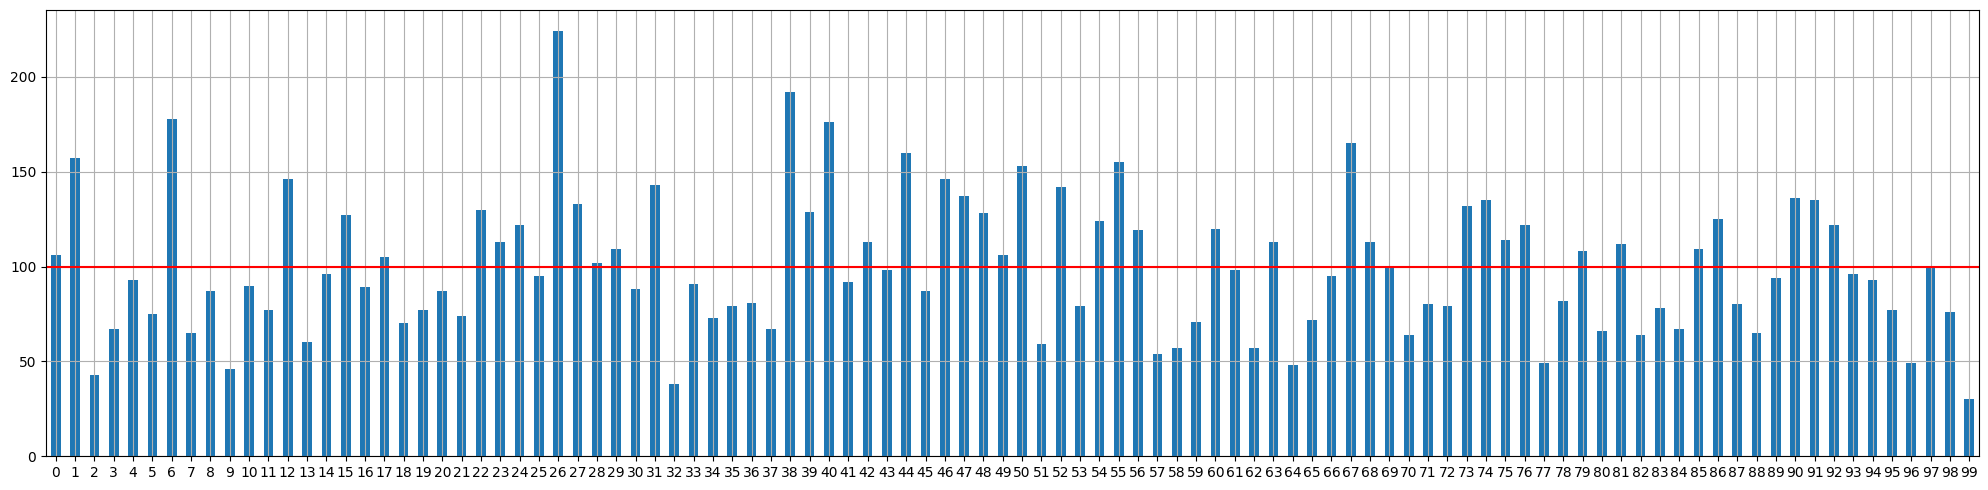

In [84]:
images_per_class.value_counts(sort=False).plot(kind='bar', figsize=(20,5),rot=0)
plt.axhline(y=100, color='r', linestyle='-')
plt.tight_layout()
plt.grid()
plt.show()

In [85]:
clspredictions=model2.predict(x_test_norm)

313/313 [==============================] - 2s 5ms/step


In [86]:
clpredictedclasses=np.argmax(clspredictions,axis=1)
clpredictedclasses.sort()

In [87]:
images_per_class=pd.Series(clpredictedclasses)
images_per_class

0        0
1        0
2        0
3        0
4        0
        ..
9995    19
9996    19
9997    19
9998    19
9999    19
Length: 10000, dtype: int64

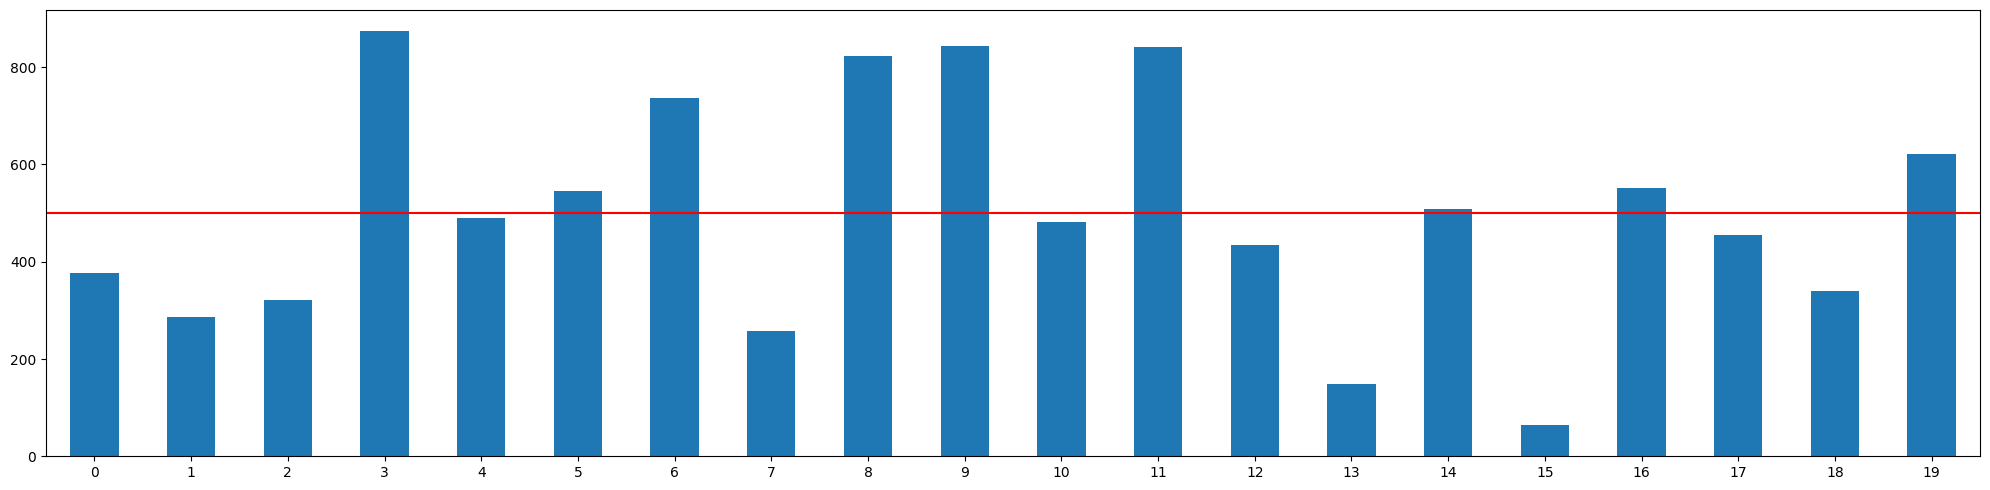

In [88]:
images_per_class.value_counts(sort=False).plot(kind='bar', figsize=(20,5),rot=0)
plt.axhline(y=500, color='r', linestyle='-')
plt.tight_layout()
plt.show()

Из графиков видно что обе модели переобучены. Наименьшее количество предсказаний набрал широкий класс 15 (reptiles), что заметно отличается от предсказаний для его узких классов 75-79 (crocodile, dinosaur, lizard, snake, turtle)


Выдвинуть предположение о причине возможного отличия.

Так как берутся особенности сразу у нескольких узких классов ( особенности разных животных,строений), то это значительно влияет на выделение признаков сверточным слоем,  фильтры получаются с паттерными от нескольких подклассов в одном широком классе.(Смесь особенностей классов)